In [1]:
# Basic Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Machine Learning Libraries 

from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

# Performace Checking Libraries 

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
df1= pd.read_csv('1.csv')
df1.head()

,Serial no,Movie Name,Director_1,Director_2,Director_3,Duration,Year,Ratings,Metascore
0,1,The Dark Knight,Christopher Nolan,NaN,NaN,152,2008,9.0,84.0
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,NaN,NaN,201,2003,9.0,94.0
2,3,Inception,Christopher Nolan,NaN,NaN,148,2010,8.8,74.0
3,4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,NaN,NaN,178,2001,8.8,92.0
4,5,The Lord of the Rings: The Two Towers,Peter Jackson,NaN,NaN,179,2002,8.8,87.0


In [3]:
df2=pd.read_csv('2.csv')
df2

,Popularity,Movie_Name,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Gross_Collection_$M,Certification
0,1,Fast X,Vin Diesel,Michelle Rodriguez,Jason Statham,Jordana Brewster,34473,Action,Adventure,Crime,NaN,PG-13
1,2,Guardians of the Galaxy Vol. 3,Chris Pratt,Chukwudi Iwuji,Bradley Cooper,Pom Klementieff,151932,Action,Adventure,Comedy,NaN,PG-13
2,3,John Wick: Chapter 4,Keanu Reeves,Laurence Fishburne,George Georgiou,Lance Reddick,184574,Action,Crime,Thriller,NaN,R
3,4,Dungeons & Dragons: Honor Among Thieves,Chris Pine,Michelle Rodriguez,Regé-Jean Page,Justice Smith,116875,Action,Adventure,Comedy,NaN,PG-13
4,5,Ant-Man and the Wasp: Quantumania,Paul Rudd,Evangeline Lilly,Michael Douglas,Michelle Pfeiffer,163120,Action,Adventure,Comedy,NaN,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1746,To Strike,Shaan Shahid,Hamza Ali Abbasi,Shamoon Abbasi,Ayesha Khan,29926,Action,Crime,Drama,NaN,NaN
1746,1747,Angels Apocalypse,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,42911,Action,Fantasy,Sci-Fi,NaN,NaN
1747,1748,Vishwaroopam,Pooja Kumar,Miles Anderson,Kamal Haasan,Rahul Bose,40553,Action,Thriller,NaN,NaN,Not Rated
1748,1749,The Way to Paradise,Enzo Zelocchi,Jennifer Lyons,Bryson Jones Allman,Brandi Maclaren,32345,Action,Comedy,Thriller,NaN,NaN


In [4]:
df=pd.merge(df1,df2,how='inner',left_on='Movie Name',right_on='Movie_Name')
df.drop('Movie_Name', axis=1, inplace= True)
df

,Serial no,Movie Name,Director_1,Director_2,Director_3,Duration,Year,Ratings,Metascore,Popularity,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Gross_Collection_$M,Certification
0,1,The Dark Knight,Christopher Nolan,NaN,NaN,152,2008,9.0,84.0,35,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2718780,Action,Crime,Drama,534.86,PG-13
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,NaN,NaN,201,2003,9.0,94.0,125,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1887419,Action,Adventure,Drama,377.85,PG-13
2,3,Inception,Christopher Nolan,NaN,NaN,148,2010,8.8,74.0,30,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2413483,Action,Adventure,Sci-Fi,292.58,PG-13
3,4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,NaN,NaN,178,2001,8.8,92.0,57,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1916063,Action,Adventure,Drama,315.54,PG-13
4,5,The Lord of the Rings: The Two Towers,Peter Jackson,NaN,NaN,179,2002,8.8,87.0,225,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1703586,Action,Adventure,Drama,342.55,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,1744,House of the Dead,Uwe Boll,NaN,NaN,90,2003,2.1,15.0,1343,Jonathan Cherry,Tyron Leitso,Clint Howard,Ona Grauer,37983,Action,Adventure,Horror,10.25,R
1479,1745,Radhe,Prabhu Deva,NaN,NaN,109,2021,1.9,NaN,1701,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,178807,Action,Crime,Thriller,NaN,TV-MA
1480,1746,Race 3,Remo D'Souza,NaN,NaN,160,2018,1.9,NaN,1702,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,47587,Action,Crime,Thriller,1.69,Not Rated
1481,1747,Angels Apocalypse,Sean Cain,Enzo Zelocchi,NaN,85,2015,1.7,NaN,1747,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,42911,Action,Fantasy,Sci-Fi,NaN,NaN


-   In the data set total 1483 rows and 20 columns are available 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1483 entries, 0 to 1482
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Serial no            1483 non-null   int64  
 1   Movie Name           1483 non-null   object 
 2   Director_1           1483 non-null   object 
 3   Director_2           84 non-null     object 
 4   Director_3           4 non-null      object 
 5   Duration             1483 non-null   int64  
 6   Year                 1483 non-null   object 
 7   Ratings              1483 non-null   float64
 8   Metascore            1350 non-null   float64
 9   Popularity           1483 non-null   int64  
 10  Stars_1              1483 non-null   object 
 11  Stars_2              1482 non-null   object 
 12  Stars_3              1482 non-null   object 
 13  Stars_4              1482 non-null   object 
 14  Votes                1483 non-null   int64  
 15  Genre_1              1483 non-null   o

- The data set consist of total 3 float values, 4 int values and remaining 13 are boject datatype values 

In [6]:
df.nunique()

Serial no              1483
Movie Name             1454
Director_1              798
Director_2               67
Director_3                4
Duration                117
Year                     72
Ratings                  65
Metascore                86
Popularity             1454
Stars_1                 612
Stars_2                 978
Stars_3                1106
Stars_4                1211
Votes                  1451
Genre_1                   2
Genre_2                  15
Genre_3                  18
Gross_Collection_$M    1186
Certification            14
dtype: int64

- From the aove output it is clear that movie names, Directors, popularity, stars, votes and Gross_collections are "continious data".
- while Duration, Year, Rating, Metascore, Genreand certificates are "catagorical data" 

In [7]:
df.isna().sum()

Serial no                 0
Movie Name                0
Director_1                0
Director_2             1399
Director_3             1479
Duration                  0
Year                      0
Ratings                   0
Metascore               133
Popularity                0
Stars_1                   0
Stars_2                   1
Stars_3                   1
Stars_4                   1
Votes                     0
Genre_1                   0
Genre_2                   2
Genre_3                 119
Gross_Collection_$M     202
Certification             4
dtype: int64

- Director2 and director3 are having maximum number of NaN values 
- Metascore is havving 133 NaN values 
- Stars-2, stars-3, start-4, Genre-3 and certificates are having single digit NaN values 
- As gross collection is output variables (predictor) which is having 202 NaN values 

In [8]:
for i in df.columns:
    print(df.value_counts(i))
    print('\n')

Serial no
1       1
1194    1
1204    1
1203    1
1202    1
       ..
625     1
624     1
623     1
622     1
1749    1
Length: 1483, dtype: int64


Movie Name
Hellboy                                       2
The Three Musketeers                          2
Clash of the Titans                           2
Get Carter                                    2
Conan the Barbarian                           2
                                             ..
How to Train Your Dragon: The Hidden World    1
How to Train Your Dragon 2                    1
How to Train Your Dragon                      1
How It Ends                                   1
Æon Flux                                      1
Length: 1454, dtype: int64


Director_1
Michael Bay         15
Tony S              13
Steven Spielberg    12
Antoine Fuqua       11
Robert Rodriguez    11
                    ..
Luke Greenfield      1
Luke S               1
M.J. Ba              1
Mahesh Bha           1
Nick Castl           1
Length: 798, dtype:

In [9]:
# Handling Missing data Replace NaN value by NA
df['Director_2']=df['Director_2'].replace(np.NaN,'NA')
df['Director_3']=df['Director_3'].replace(np.NaN,'NA')
df['Metascore']= df['Metascore'].replace(np.NaN,'NA')
df['Stars_2']=df['Stars_2'].replace(np.NaN,'NA')
df['Stars_3']=df['Stars_3'].replace(np.NaN,'NA')
df['Stars_4']=df['Stars_4'].replace(np.NaN, 'NA')
df['Genre_2']=df['Genre_2'].replace(np.NaN,'NA')
df['Genre_3']=df['Genre_3'].replace(np.NaN,'NA')
df['Certification']=df['Certification'].replace(np.NaN,'NA')

In [10]:
df.isnull().sum()

Serial no                0
Movie Name               0
Director_1               0
Director_2               0
Director_3               0
Duration                 0
Year                     0
Ratings                  0
Metascore                0
Popularity               0
Stars_1                  0
Stars_2                  0
Stars_3                  0
Stars_4                  0
Votes                    0
Genre_1                  0
Genre_2                  0
Genre_3                  0
Gross_Collection_$M    202
Certification            0
dtype: int64

- All themissing values (NaN) are handled using replace commands.
- Gross collection is not comnsidered for reving NaN values beacause it is predictor so we directly remove all thr NaN values present in the respective columns 

In [11]:
df.dropna()

,Serial no,Movie Name,Director_1,Director_2,Director_3,Duration,Year,Ratings,Metascore,Popularity,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Gross_Collection_$M,Certification
0,1,The Dark Knight,Christopher Nolan,NA,NA,152,2008,9.0,84.0,35,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2718780,Action,Crime,Drama,534.86,PG-13
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,NA,NA,201,2003,9.0,94.0,125,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1887419,Action,Adventure,Drama,377.85,PG-13
2,3,Inception,Christopher Nolan,NA,NA,148,2010,8.8,74.0,30,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2413483,Action,Adventure,Sci-Fi,292.58,PG-13
3,4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,NA,NA,178,2001,8.8,92.0,57,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1916063,Action,Adventure,Drama,315.54,PG-13
4,5,The Lord of the Rings: The Two Towers,Peter Jackson,NA,NA,179,2002,8.8,87.0,225,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1703586,Action,Adventure,Drama,342.55,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,1738,Dragonball Evolution,James Wong,NA,NA,85,2009,2.5,45.0,452,Justin Chatwin,James Marsters,Chow Yun-Fat,Emmy Rossum,77006,Action,Adventure,Fantasy,9.35,PG
1473,1739,Battlefield Earth,Roger Christian,NA,NA,118,2000,2.5,9.0,1164,John Travolta,Forest Whitaker,Barry Pepper,Kim Coates,81577,Action,Adventure,Sci-Fi,21.47,PG-13
1476,1742,Alone in the Dark,Uwe Boll,NA,NA,99,2005,2.4,9.0,1362,Christian Slater,Tara Reid,Stephen Dorff,Frank C. Turner,46327,Action,Horror,Sci-Fi,5.18,R
1478,1744,House of the Dead,Uwe Boll,NA,NA,90,2003,2.1,15.0,1343,Jonathan Cherry,Tyron Leitso,Clint Howard,Ona Grauer,37983,Action,Adventure,Horror,10.25,R


In [12]:
df.nunique()

Serial no              1483
Movie Name             1454
Director_1              798
Director_2               68
Director_3                5
Duration                117
Year                     72
Ratings                  65
Metascore                87
Popularity             1454
Stars_1                 612
Stars_2                 979
Stars_3                1107
Stars_4                1212
Votes                  1451
Genre_1                   2
Genre_2                  16
Genre_3                  19
Gross_Collection_$M    1186
Certification            15
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1483 entries, 0 to 1482
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Serial no            1483 non-null   int64  
 1   Movie Name           1483 non-null   object 
 2   Director_1           1483 non-null   object 
 3   Director_2           1483 non-null   object 
 4   Director_3           1483 non-null   object 
 5   Duration             1483 non-null   int64  
 6   Year                 1483 non-null   object 
 7   Ratings              1483 non-null   float64
 8   Metascore            1483 non-null   object 
 9   Popularity           1483 non-null   int64  
 10  Stars_1              1483 non-null   object 
 11  Stars_2              1483 non-null   object 
 12  Stars_3              1483 non-null   object 
 13  Stars_4              1483 non-null   object 
 14  Votes                1483 non-null   int64  
 15  Genre_1              1483 non-null   o

- The datatype of Matascore and Year are object but these are numerical values so we need to change the datatype 
- In case of Metascore conversion of data from Object to flaot we have to replace NA value by certain float value by which is considered as 0.0

In [14]:
df['Year']=df['Year'].astype('int')

In [15]:
df['Metascore']=df['Metascore'].replace('NA','')

In [16]:
df['Metascore']=df['Metascore'].replace('','0.0')

In [17]:
df['Metascore']=df['Metascore'].astype('float')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1483 entries, 0 to 1482
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Serial no            1483 non-null   int64  
 1   Movie Name           1483 non-null   object 
 2   Director_1           1483 non-null   object 
 3   Director_2           1483 non-null   object 
 4   Director_3           1483 non-null   object 
 5   Duration             1483 non-null   int64  
 6   Year                 1483 non-null   int32  
 7   Ratings              1483 non-null   float64
 8   Metascore            1483 non-null   float64
 9   Popularity           1483 non-null   int64  
 10  Stars_1              1483 non-null   object 
 11  Stars_2              1483 non-null   object 
 12  Stars_3              1483 non-null   object 
 13  Stars_4              1483 non-null   object 
 14  Votes                1483 non-null   int64  
 15  Genre_1              1483 non-null   o

In [19]:
df

,Serial no,Movie Name,Director_1,Director_2,Director_3,Duration,Year,Ratings,Metascore,Popularity,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Gross_Collection_$M,Certification
0,1,The Dark Knight,Christopher Nolan,NA,NA,152,2008,9.0,84.0,35,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2718780,Action,Crime,Drama,534.86,PG-13
1,2,The Lord of the Rings: The Return of the King,Peter Jackson,NA,NA,201,2003,9.0,94.0,125,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1887419,Action,Adventure,Drama,377.85,PG-13
2,3,Inception,Christopher Nolan,NA,NA,148,2010,8.8,74.0,30,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2413483,Action,Adventure,Sci-Fi,292.58,PG-13
3,4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,NA,NA,178,2001,8.8,92.0,57,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1916063,Action,Adventure,Drama,315.54,PG-13
4,5,The Lord of the Rings: The Two Towers,Peter Jackson,NA,NA,179,2002,8.8,87.0,225,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1703586,Action,Adventure,Drama,342.55,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,1744,House of the Dead,Uwe Boll,NA,NA,90,2003,2.1,15.0,1343,Jonathan Cherry,Tyron Leitso,Clint Howard,Ona Grauer,37983,Action,Adventure,Horror,10.25,R
1479,1745,Radhe,Prabhu Deva,NA,NA,109,2021,1.9,0.0,1701,Salman Khan,Disha Patani,Randeep Hooda,Jackie Shroff,178807,Action,Crime,Thriller,NaN,TV-MA
1480,1746,Race 3,Remo D'Souza,NA,NA,160,2018,1.9,0.0,1702,Anil Kapoor,Salman Khan,Bobby Deol,Jacqueline Fernandez,47587,Action,Crime,Thriller,1.69,Not Rated
1481,1747,Angels Apocalypse,Sean Cain,Enzo Zelocchi,NA,85,2015,1.7,0.0,1747,Enzo Zelocchi,Jana Rochelle,Ryan C.F. Buckley,William Kirkham,42911,Action,Fantasy,Sci-Fi,NaN,NA


# Univeriant Analysis

<AxesSubplot:xlabel='Duration', ylabel='count'>

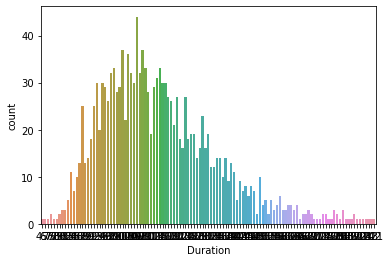

In [20]:
sns.countplot(df['Duration'])

In [21]:
df.drop('Serial no',axis=1,inplace= True)

- As Serial no. does not have any significant meaning so we are dropping from column 

In [22]:
object_data=[]
other_data=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        object_data.append(i)
    else:
        other_data.append(i)

In [23]:
object_data

['Movie Name',
 'Director_1',
 'Director_2',
 'Director_3',
 'Stars_1',
 'Stars_2',
 'Stars_3',
 'Stars_4',
 'Genre_1',
 'Genre_2',
 'Genre_3',
 'Certification']

In [24]:
other_data

['Duration',
 'Year',
 'Ratings',
 'Metascore',
 'Popularity',
 'Votes',
 'Gross_Collection_$M']

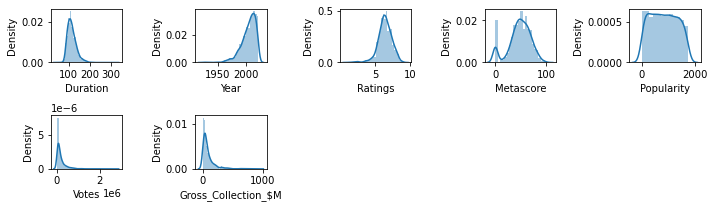

In [25]:
plt.figure(figsize=(10,4))
plotno=1
for i in other_data:
    if plotno<=10:
        ax=plt.subplot(3,5,plotno)
        sns.distplot(df[i])
        plt.xlabel(i,size=10)
    plotno+=1
plt.tight_layout()

- We are going to ignore the serial no. as it doesn't have any signifcant\
- Except Popularity all other parameters are distributed

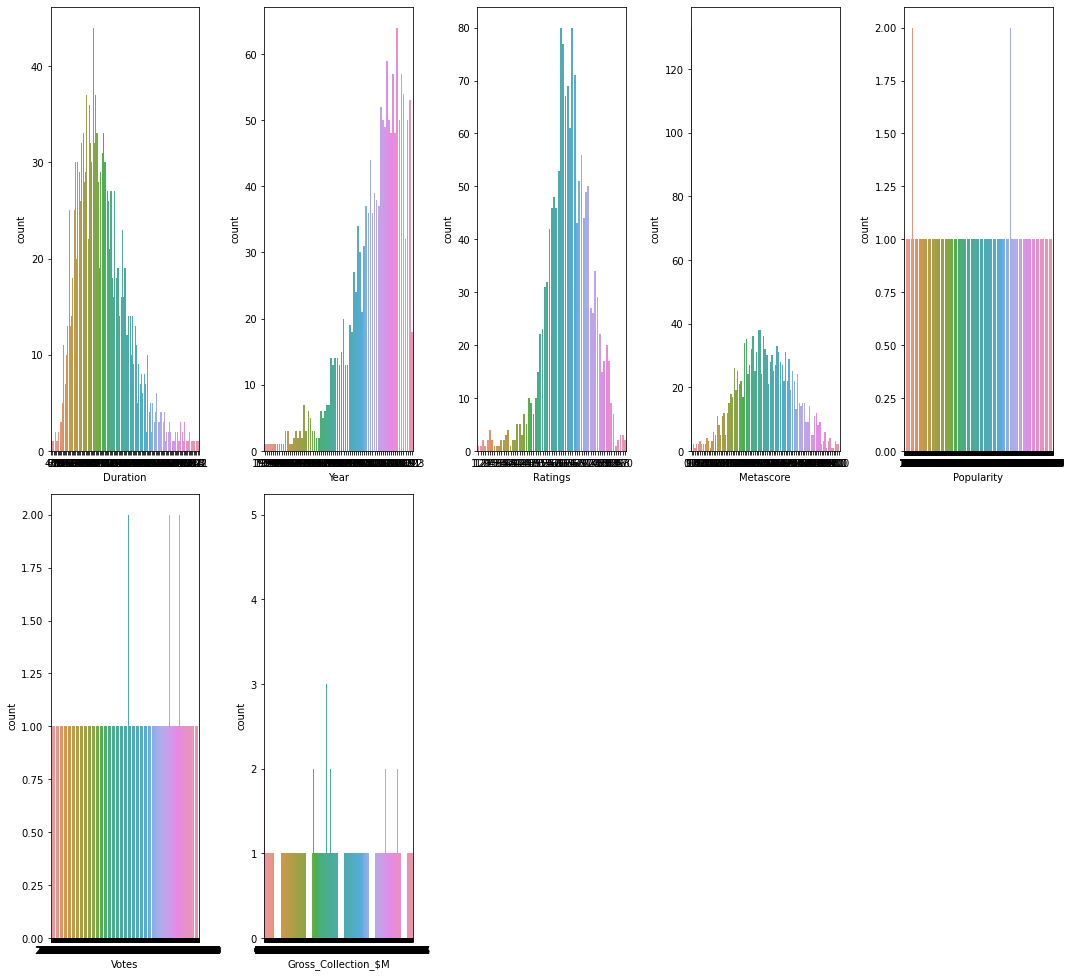

In [26]:
plt.figure(figsize=(15,20))
plotno=1
for i in other_data:
    if plotno<=10:
        ax=plt.subplot(3,5,plotno)
        sns.countplot(df[i])
        plt.xlabel(i,size=10)
    plotno+=1
plt.tight_layout()

- For all catagorical data, countplots are developed 
- the columns like Duration, Rating and Metascore having bell shape curve data spread over the axis 
- The data columns like Popularity, Votes and Gross_collections are having data does not having proper conncetions i.e. unique values are present in the datasets so that only unique value is reflected on the y- axis 


In [27]:
object_data

['Movie Name',
 'Director_1',
 'Director_2',
 'Director_3',
 'Stars_1',
 'Stars_2',
 'Stars_3',
 'Stars_4',
 'Genre_1',
 'Genre_2',
 'Genre_3',
 'Certification']

In [28]:
df['Genre_1'].value_counts()

Action       1432
Animation      51
Name: Genre_1, dtype: int64

In [29]:
df['Genre_2'].value_counts()

Adventure    559
Crime        288
Comedy       202
Drama        167
Sci-Fi        55
Action        51
Thriller      51
Horror        43
Biography     24
Mystery       19
Fantasy       17
War            2
NA             2
Romance        1
Sport          1
Family         1
Name: Genre_2, dtype: int64

In [30]:
df['Genre_3'].value_counts()

Thriller     264
Drama        263
Sci-Fi       204
Crime        138
Comedy       128
NA           119
Fantasy      109
Adventure     47
Horror        46
History       37
Mystery       36
Romance       23
Family        22
War           15
Sport         15
Biography      8
Western        7
Music          1
Musical        1
Name: Genre_3, dtype: int64

- The Action as a Genre has maximum types total 1432
- Music, Musical,Family, Sport and Romance has only one Genre

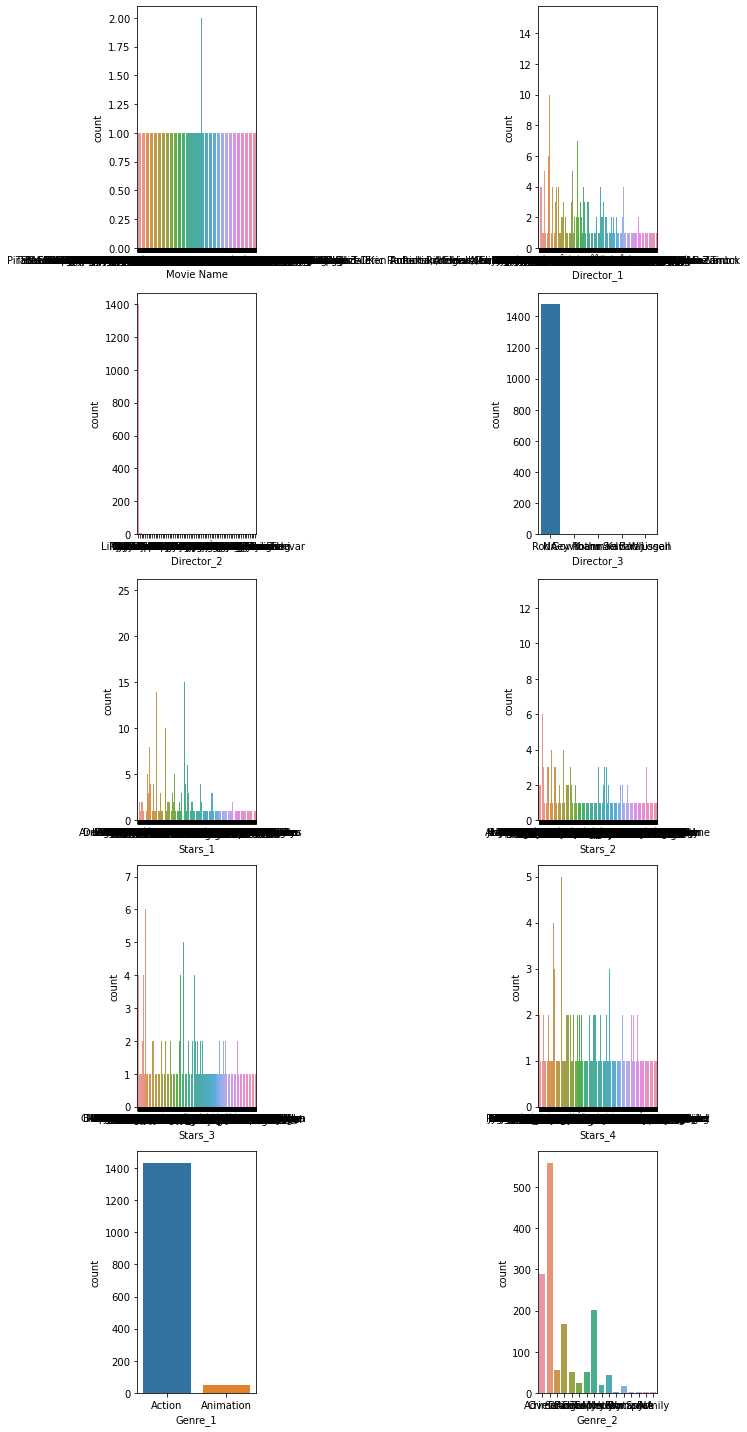

In [31]:
plt.figure(figsize=(10,20))
plotno=1
for i in object_data:
    if plotno<=10:
        ax=plt.subplot(5,2,plotno)
        sns.countplot(df[i])
        plt.xlabel(i,size=10)
    plotno+=1
plt.tight_layout()

- All the catagorical data sets are reflected in the form of graphs 

<AxesSubplot:xlabel='Certification', ylabel='count'>

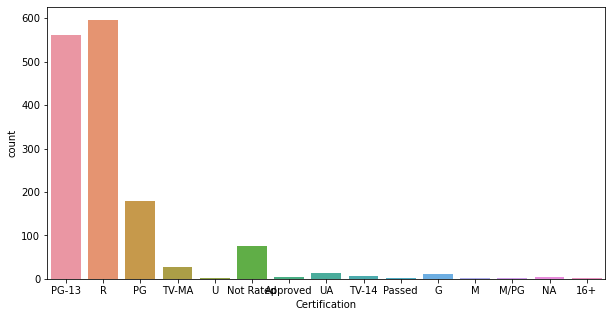

In [32]:
df['Certification'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(data=df, x= 'Certification' )

In [33]:
df['Certification'].value_counts()

R            596
PG-13        561
PG           178
Not Rated     75
TV-MA         27
UA            14
G             10
TV-14          6
Approved       4
NA             4
U              2
Passed         2
M              2
M/PG           1
16+            1
Name: Certification, dtype: int64

- In the certificate columns major contributions are PG-13 having 596 counts, R is having 561 counts, PG is having 178 counts,TV-MA is having 27 values while NOT RATED is having 75 values while UA and G are 14 and 10 value counts under respective heads.
- Remaing all the heads i.e. TV-14, Approved, M, M/PG, 16+ are single digit value counts 

# Bivarient Analysis

<AxesSubplot:xlabel='Certification', ylabel='count'>

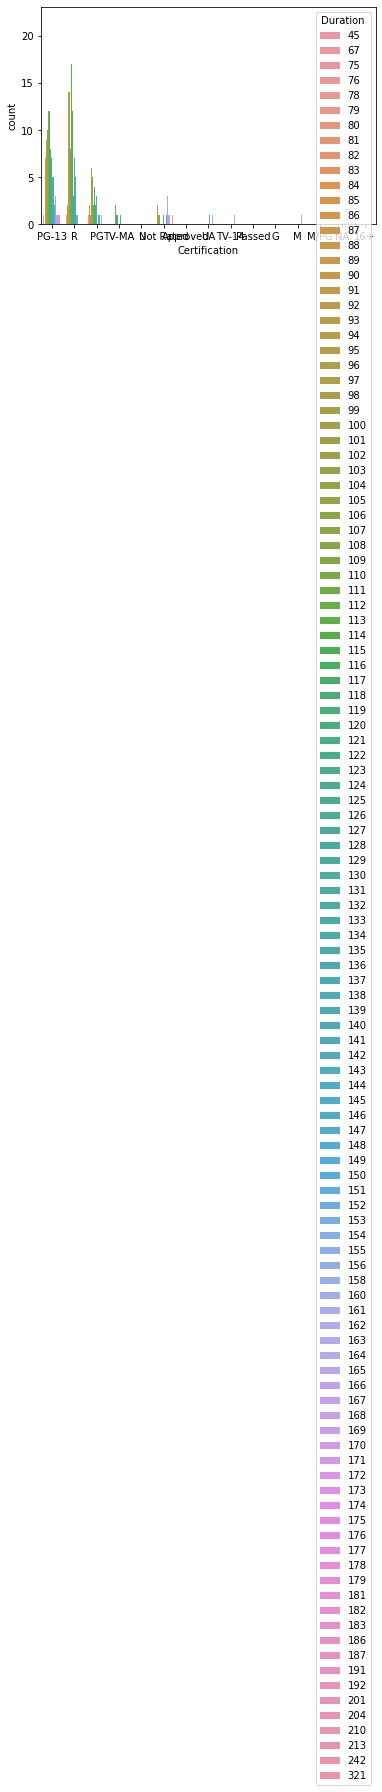

In [34]:
sns.countplot(data=df, x='Certification', hue='Duration')

Action       1432
Animation      51
Name: Genre_1, dtype: int64

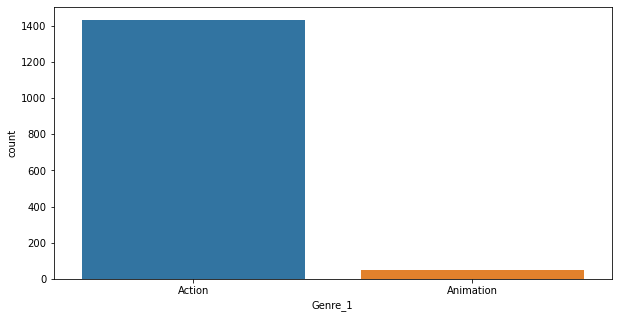

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x= 'Genre_1' )
df['Genre_1'].value_counts()

Thriller     264
Drama        263
Sci-Fi       204
Crime        138
Comedy       128
NA           119
Fantasy      109
Adventure     47
Horror        46
History       37
Mystery       36
Romance       23
Family        22
War           15
Sport         15
Biography      8
Western        7
Music          1
Musical        1
Name: Genre_3, dtype: int64

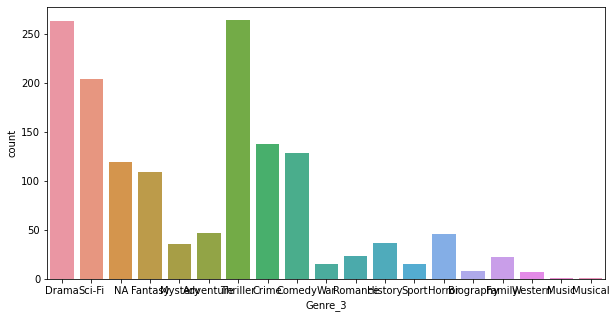

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x= 'Genre_3' )
df['Genre_3'].value_counts()

In [37]:
df.columns

Index(['Movie Name', 'Director_1', 'Director_2', 'Director_3', 'Duration',
       'Year', 'Ratings', 'Metascore', 'Popularity', 'Stars_1', 'Stars_2',
       'Stars_3', 'Stars_4', 'Votes', 'Genre_1', 'Genre_2', 'Genre_3',
       'Gross_Collection_$M', 'Certification'],
      dtype='object')

2016    64
2011    59
2014    57
2018    57
2019    54
        ..
1948     1
1938     1
1960     1
1964     1
1965     1
Name: Year, Length: 72, dtype: int64

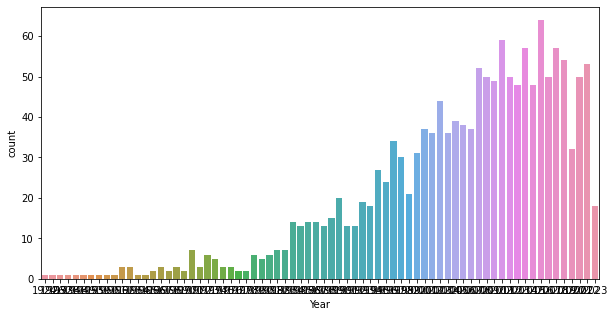

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x= 'Year')
df['Year'].value_counts()

6.6    80
6.1    80
6.2    77
6.7    71
6.4    69
       ..
3.1     1
8.5     1
2.1     1
1.7     1
1.2     1
Name: Ratings, Length: 65, dtype: int64

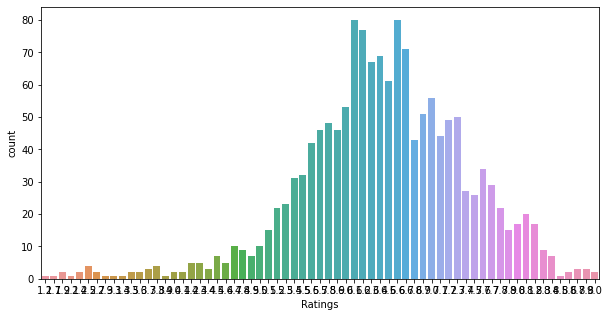

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x= 'Ratings')
df['Ratings'].value_counts()

0.0     133
49.0     38
48.0     38
51.0     36
45.0     36
       ... 
88.0      1
20.0      1
92.0      1
11.0      1
93.0      1
Name: Metascore, Length: 87, dtype: int64

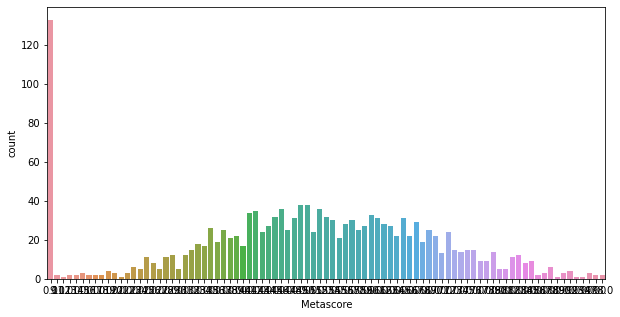

In [40]:
df['Metascore'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(data=df, x= 'Metascore')
df['Metascore'].value_counts()

423022     2
443801     2
155498     2
377183     2
1416204    2
          ..
327141     1
491415     1
579522     1
61365      1
96254      1
Name: Votes, Length: 1451, dtype: int64

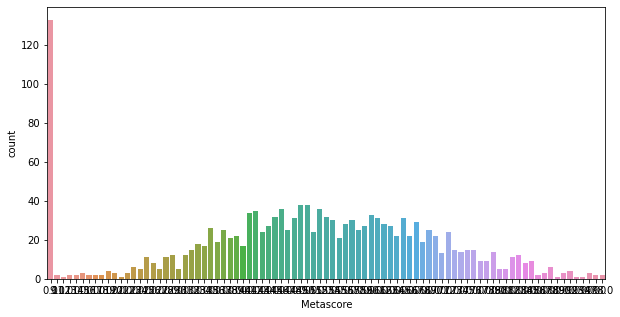

In [41]:
df['Votes'].value_counts()
plt.figure(figsize=(10,5))
sns.countplot(data=df, x= 'Metascore')
df['Votes'].value_counts()

Arnold Schwarzenegger    25
Sylvester Stallone       25
Bruce Willis             22
Mel Gibson               18
Dwayne Johnson           18
                         ..
Yul Brynner               1
Harry Dean Stanton        1
Andre Gower               1
Nick Nolte                1
Anil Kapoor               1
Name: Stars_1, Length: 612, dtype: int64


<AxesSubplot:xlabel='Stars_1', ylabel='count'>

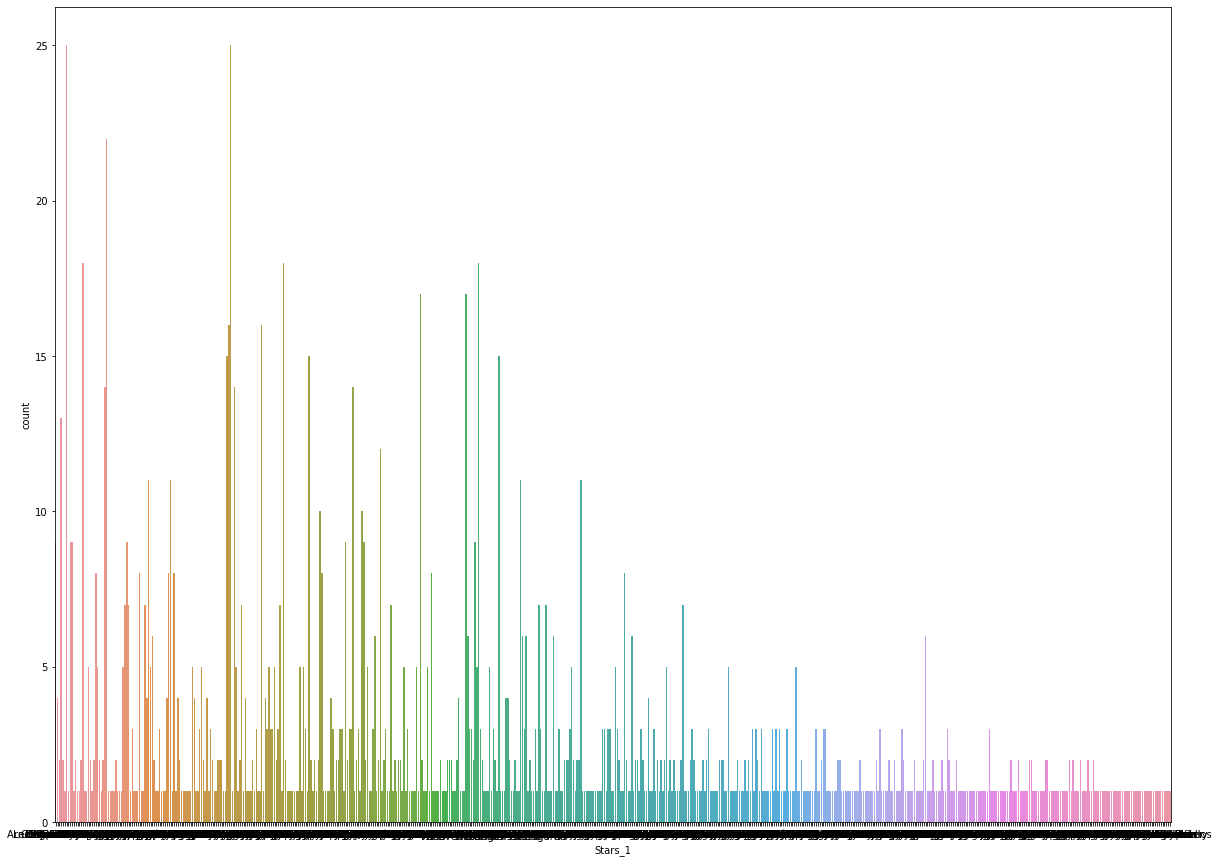

In [42]:
print(df['Stars_1'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='Stars_1', data=df)

Samuel L. Jackson     13
Mark Wahlberg          8
Cate Blanchett         6
Laurence Fishburne     6
Natalie Portman        6
                      ..
Maryam d'Abo           1
Will Yun Lee           1
Robert Preston         1
Cary Elwes             1
Priyanka Bose          1
Name: Stars_2, Length: 979, dtype: int64


<AxesSubplot:xlabel='Stars_2', ylabel='count'>

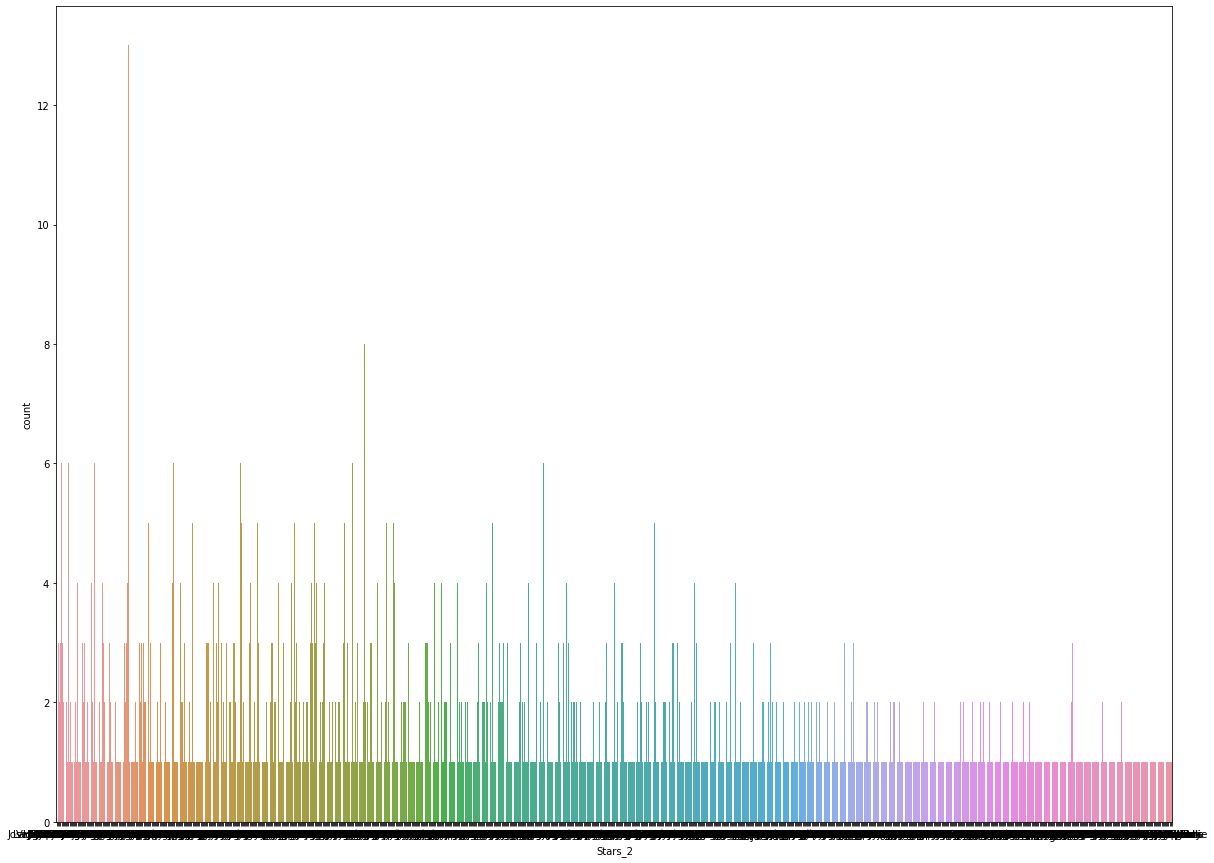

In [43]:
print(df['Stars_2'].value_counts())
plt.figure(figsize=(20,15))
sns.countplot(x='Stars_2', data=df)

<AxesSubplot:xlabel='Gross_Collection_$M', ylabel='count'>

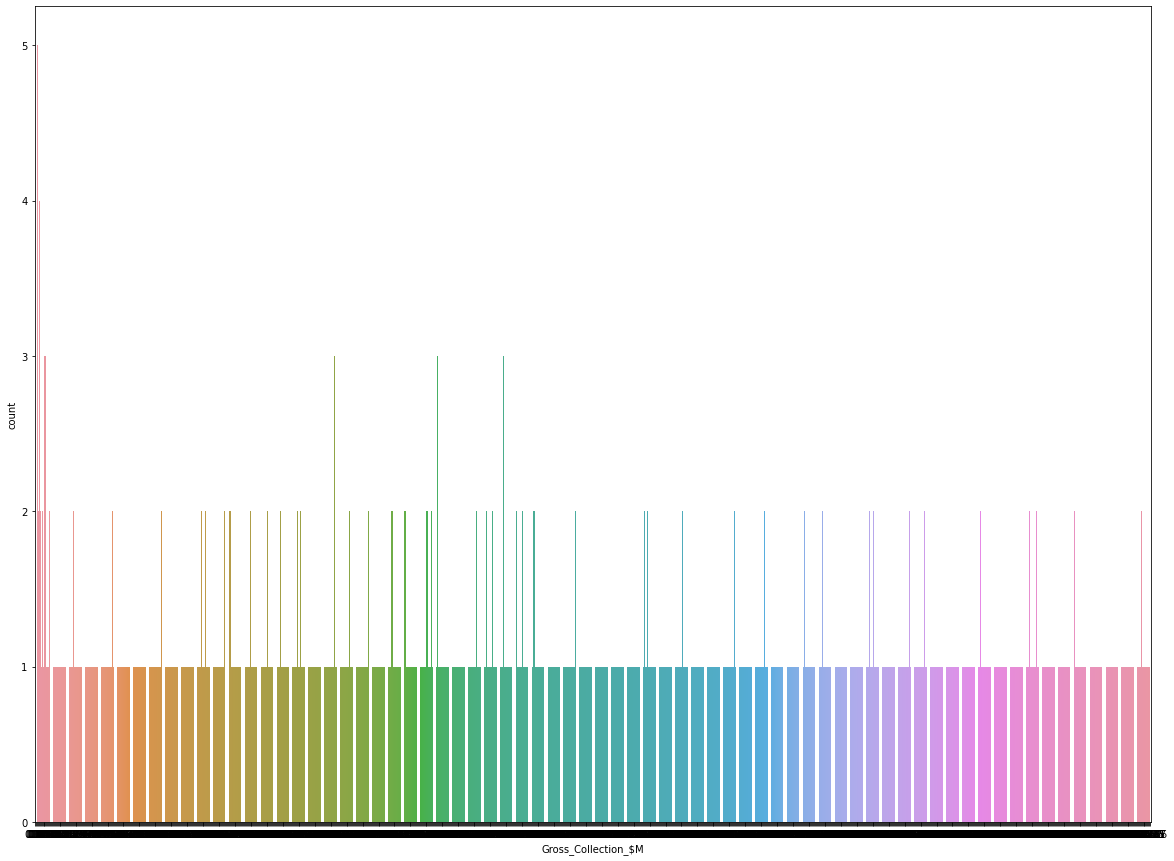

In [44]:
df['Gross_Collection_$M'].value_counts()
plt.figure(figsize=(20,15))
sns.countplot(x='Gross_Collection_$M', data=df)

In [45]:
df['Gross_Collection_$M'].value_counts()

0.03      5
0.05      4
0.00      4
0.01      4
34.02     3
         ..
108.19    1
33.33     1
83.29     1
74.49     1
1.69      1
Name: Gross_Collection_$M, Length: 1186, dtype: int64

In [46]:
df.head()

,Movie Name,Director_1,Director_2,Director_3,Duration,Year,Ratings,Metascore,Popularity,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Gross_Collection_$M,Certification
0,The Dark Knight,Christopher Nolan,NA,NA,152,2008,9.0,84.0,35,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2718780,Action,Crime,Drama,534.86,PG-13
1,The Lord of the Rings: The Return of the King,Peter Jackson,NA,NA,201,2003,9.0,94.0,125,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1887419,Action,Adventure,Drama,377.85,PG-13
2,Inception,Christopher Nolan,NA,NA,148,2010,8.8,74.0,30,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2413483,Action,Adventure,Sci-Fi,292.58,PG-13
3,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,NA,NA,178,2001,8.8,92.0,57,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1916063,Action,Adventure,Drama,315.54,PG-13
4,The Lord of the Rings: The Two Towers,Peter Jackson,NA,NA,179,2002,8.8,87.0,225,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1703586,Action,Adventure,Drama,342.55,PG-13


In [47]:
df.isna().sum()

Movie Name               0
Director_1               0
Director_2               0
Director_3               0
Duration                 0
Year                     0
Ratings                  0
Metascore                0
Popularity               0
Stars_1                  0
Stars_2                  0
Stars_3                  0
Stars_4                  0
Votes                    0
Genre_1                  0
Genre_2                  0
Genre_3                  0
Gross_Collection_$M    202
Certification            0
dtype: int64

In [48]:
df= df.dropna()
df

,Movie Name,Director_1,Director_2,Director_3,Duration,Year,Ratings,Metascore,Popularity,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Gross_Collection_$M,Certification
0,The Dark Knight,Christopher Nolan,NA,NA,152,2008,9.0,84.0,35,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2718780,Action,Crime,Drama,534.86,PG-13
1,The Lord of the Rings: The Return of the King,Peter Jackson,NA,NA,201,2003,9.0,94.0,125,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1887419,Action,Adventure,Drama,377.85,PG-13
2,Inception,Christopher Nolan,NA,NA,148,2010,8.8,74.0,30,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2413483,Action,Adventure,Sci-Fi,292.58,PG-13
3,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,NA,NA,178,2001,8.8,92.0,57,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1916063,Action,Adventure,Drama,315.54,PG-13
4,The Lord of the Rings: The Two Towers,Peter Jackson,NA,NA,179,2002,8.8,87.0,225,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1703586,Action,Adventure,Drama,342.55,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,Dragonball Evolution,James Wong,NA,NA,85,2009,2.5,45.0,452,Justin Chatwin,James Marsters,Chow Yun-Fat,Emmy Rossum,77006,Action,Adventure,Fantasy,9.35,PG
1473,Battlefield Earth,Roger Christian,NA,NA,118,2000,2.5,9.0,1164,John Travolta,Forest Whitaker,Barry Pepper,Kim Coates,81577,Action,Adventure,Sci-Fi,21.47,PG-13
1476,Alone in the Dark,Uwe Boll,NA,NA,99,2005,2.4,9.0,1362,Christian Slater,Tara Reid,Stephen Dorff,Frank C. Turner,46327,Action,Horror,Sci-Fi,5.18,R
1478,House of the Dead,Uwe Boll,NA,NA,90,2003,2.1,15.0,1343,Jonathan Cherry,Tyron Leitso,Clint Howard,Ona Grauer,37983,Action,Adventure,Horror,10.25,R


<AxesSubplot:>

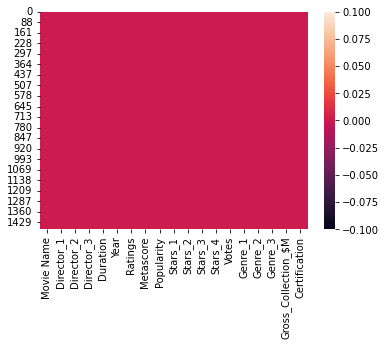

In [49]:
sns.heatmap(df.isna())

In [50]:
df.skew()

Duration               1.014037
Year                  -1.347691
Ratings               -0.582423
Metascore             -0.481139
Popularity             0.072681
Votes                  3.531617
Gross_Collection_$M    3.219528
dtype: float64

- as the values of Duration , Year, Votes, Gross collections as greater than +-1 so it need to control the amounts
- To remove skewness we can use cuberoot method 

In [51]:
df['Duration']=np.cbrt(df['Duration'])
df['Year']=np.cbrt(df['Year'])

In [52]:
df.skew()

Duration               0.567877
Year                  -1.369931
Ratings               -0.582423
Metascore             -0.481139
Popularity             0.072681
Votes                  3.531617
Gross_Collection_$M    3.219528
dtype: float64

- As Votes and Gross_Collections_$M are the out put predictors, so we can't remove the skewness from them 

In [53]:
df.describe()

,Duration,Year,Ratings,Metascore,Popularity,Votes,Gross_Collection_$M
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1.281000e+03,1281.000000
mean,4.835974,12.607773,6.435988,50.380952,811.217018,2.112368e+05,82.655550
std,0.271704,0.026587,0.933010,18.890889,479.920153,2.587907e+05,106.424441
min,3.556893,12.437555,1.900000,0.000000,11.000000,2.502800e+04,0.000000
25%,4.641589,12.592908,5.900000,40.000000,391.000000,5.876300e+04,21.900000
50%,4.805896,12.613892,6.500000,51.000000,805.000000,1.209060e+05,47.060000
75%,5.000000,12.628540,7.000000,63.000000,1221.000000,2.583540e+05,102.310000
max,5.972093,12.645239,9.000000,98.000000,1730.000000,2.718780e+06,936.660000


- The mean and 50% percentile values are almost same, so skewness is not present in the data sets 
- The difference between 75% and maximum value is negligible for Duration, Year, Votes. so no outliears are present in the data sets 
- In the Metascore and Popularity is considerable difference is seen so outliears may present in the data

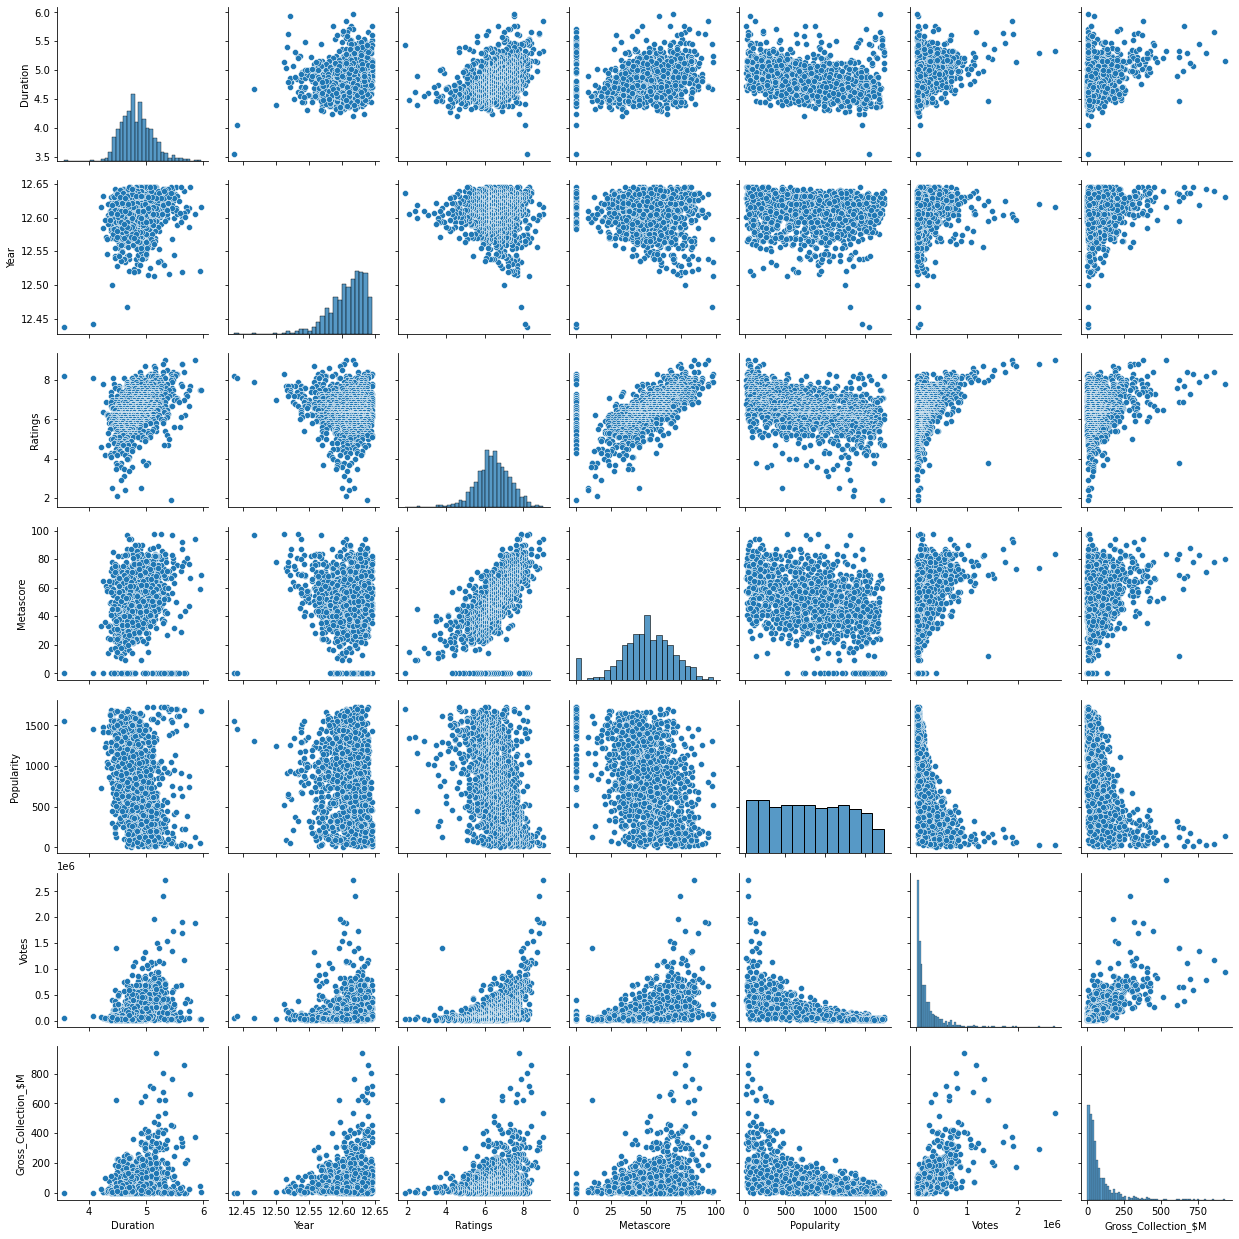

In [54]:
sns.pairplot(df)

- From the pairplot, the relationship between all the variables amongs each other are clearly visible 
- The relationship between Gross_collection with Duration, Year, Ratings, Metascore and votes are positive while Popularity is negative relation with Gross-collection
- The similar nature or relation is folled in case of Votes and other factors 
- Rating and metascore are directly proportional with each other 
- Votes and Ratings are directly proportional with each other similar phenomenon is obsered in the Votes and year 

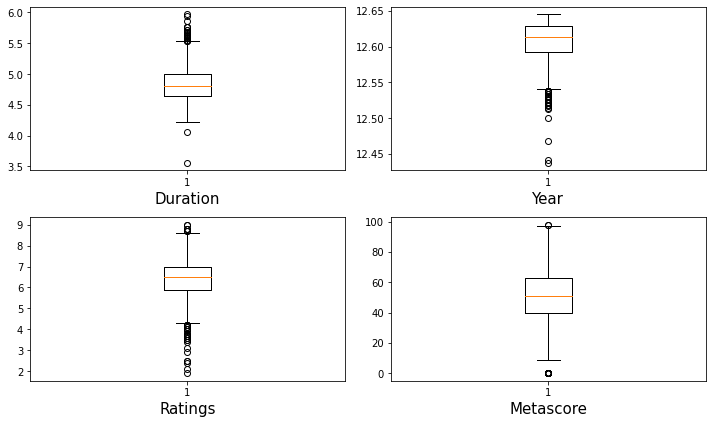

In [55]:
plt.figure(figsize=(10,6))
plotnumber=1
for i in other_data:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        plt.boxplot(x=df[i])
        plt.xlabel(i, fontsize=15)
    plotnumber+=1
plt.tight_layout()
    

- As per the above diagram it is clear that the outlier are present in the Duration, ratings, Year and Metascores. So we need to remove these values from the datasets 

In [56]:
df.shape

(1281, 19)

In [57]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df     

,Movie Name,Director_1,Director_2,Director_3,Duration,Year,Ratings,Metascore,Popularity,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Gross_Collection_$M,Certification
0,950.0,103.0,33.0,1.0,5.336803,12.615987,9.0,84.0,35,84.0,290.0,1.0,652.0,2718780,0.0,4.0,4.0,534.86,5.0
1,1036.0,428.0,33.0,1.0,5.857766,12.605507,9.0,94.0,125,139.0,794.0,350.0,742.0,1887419,0.0,1.0,4.0,377.85,5.0
2,436.0,103.0,33.0,1.0,5.289572,12.620174,8.8,74.0,30,298.0,408.0,267.0,527.0,2413483,0.0,1.0,13.0,292.58,5.0
3,1035.0,428.0,33.0,1.0,5.625226,12.601310,8.8,92.0,57,139.0,304.0,702.0,888.0,1916063,0.0,1.0,4.0,315.54,5.0
4,1037.0,428.0,33.0,1.0,5.635741,12.603409,8.8,87.0,225,139.0,304.0,920.0,742.0,1703586,0.0,1.0,4.0,342.55,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,274.0,206.0,33.0,1.0,4.396830,12.618081,2.5,45.0,452,260.0,322.0,144.0,278.0,77006,0.0,1.0,6.0,9.35,4.0
1473,108.0,487.0,33.0,1.0,4.904868,12.599210,2.5,9.0,1164,244.0,243.0,74.0,543.0,81577,0.0,1.0,13.0,21.47,5.0
1476,50.0,590.0,33.0,1.0,4.626065,12.609701,2.4,9.0,1362,85.0,759.0,852.0,302.0,46327,0.0,8.0,13.0,5.18,7.0
1478,417.0,590.0,33.0,1.0,4.481405,12.605507,2.1,15.0,1343,249.0,787.0,169.0,740.0,37983,0.0,1.0,8.0,10.25,7.0


- For conversion of catagorical data into numerical data Eng=coders are used. So all the data is converted into numerical data so the algorithms can be applicables 

In [58]:
df=df.dropna()

In [59]:
df

,Movie Name,Director_1,Director_2,Director_3,Duration,Year,Ratings,Metascore,Popularity,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Gross_Collection_$M,Certification
0,950.0,103.0,33.0,1.0,5.336803,12.615987,9.0,84.0,35,84.0,290.0,1.0,652.0,2718780,0.0,4.0,4.0,534.86,5.0
1,1036.0,428.0,33.0,1.0,5.857766,12.605507,9.0,94.0,125,139.0,794.0,350.0,742.0,1887419,0.0,1.0,4.0,377.85,5.0
2,436.0,103.0,33.0,1.0,5.289572,12.620174,8.8,74.0,30,298.0,408.0,267.0,527.0,2413483,0.0,1.0,13.0,292.58,5.0
3,1035.0,428.0,33.0,1.0,5.625226,12.601310,8.8,92.0,57,139.0,304.0,702.0,888.0,1916063,0.0,1.0,4.0,315.54,5.0
4,1037.0,428.0,33.0,1.0,5.635741,12.603409,8.8,87.0,225,139.0,304.0,920.0,742.0,1703586,0.0,1.0,4.0,342.55,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,274.0,206.0,33.0,1.0,4.396830,12.618081,2.5,45.0,452,260.0,322.0,144.0,278.0,77006,0.0,1.0,6.0,9.35,4.0
1473,108.0,487.0,33.0,1.0,4.904868,12.599210,2.5,9.0,1164,244.0,243.0,74.0,543.0,81577,0.0,1.0,13.0,21.47,5.0
1476,50.0,590.0,33.0,1.0,4.626065,12.609701,2.4,9.0,1362,85.0,759.0,852.0,302.0,46327,0.0,8.0,13.0,5.18,7.0
1478,417.0,590.0,33.0,1.0,4.481405,12.605507,2.1,15.0,1343,249.0,787.0,169.0,740.0,37983,0.0,1.0,8.0,10.25,7.0


In [60]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,Movie Name,Director_1,Director_2,Director_3,Duration,Year,Ratings,Metascore,Popularity,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Gross_Collection_$M,Certification
0,0.891206,1.266430,0.108456,0.022819,1.844009,0.309080,2.749180,1.780338,1.618020,1.147032,0.530297,1.731576,0.449230,9.693248,0.197305,0.169751,0.855767,4.250725,0.442304
1,1.129078,0.472882,0.108456,0.022819,3.762148,0.085251,2.749180,2.309901,1.430415,0.779058,1.577208,0.469522,0.744916,6.479510,0.197305,0.755571,0.855767,2.774830,0.442304
2,0.530493,1.266430,0.108456,0.022819,1.670109,0.466629,2.534737,1.250776,1.628442,0.284723,0.036873,0.769667,0.038555,8.513081,0.197305,0.755571,0.913626,1.973291,0.442304
3,1.126312,0.472882,0.108456,0.022819,2.905957,0.243167,2.534737,2.203988,1.572161,0.779058,0.471756,0.803381,1.224584,6.590237,0.197305,0.755571,0.855767,2.189116,0.442304
4,1.131844,0.472882,0.108456,0.022819,2.944670,0.164196,2.534737,1.939207,1.221966,0.779058,0.471756,1.591713,0.744916,5.768878,0.197305,0.755571,0.855767,2.443010,0.442304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0.978577,0.715202,0.108456,0.022819,1.616892,0.387867,4.220236,0.284955,0.748786,0.030486,0.396487,1.214460,0.779509,0.518888,0.197305,0.755571,0.462568,0.689073,1.195751
1473,1.437725,0.788634,0.108456,0.022819,0.253661,0.322165,4.220236,2.191380,0.735374,0.076561,0.726831,1.467594,0.091122,0.501218,0.197305,0.755571,0.913626,0.575145,0.442304
1476,1.598150,1.339863,0.108456,0.022819,0.772867,0.072560,4.327458,2.191380,1.148104,1.140342,1.430854,1.345812,0.700659,0.637481,0.197305,1.403512,0.913626,0.728271,1.064589
1478,0.583046,1.339863,0.108456,0.022819,1.305494,0.085251,4.649123,1.873642,1.108498,0.043109,1.547937,1.124055,0.738345,0.669736,0.197305,0.755571,0.069370,0.680613,1.064589


In [61]:
df1=df[(z<3).all(axis=1)]

df1.shape

(1087, 19)

In [62]:
df.shape

(1281, 19)

In [63]:
#error=((df.shape[0]-df.shape[0])/df.shape[0])*100
print('Percentage drop in the data = ', ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Percentage drop in the data =  15.144418423106949


- for removing outliers from the data zscore method is being used. 
- The loss of data after removing ouliers from datasets is around 15.1% whihc is considerably low so we can proceed further for machine learning algorithms 

In [64]:
df1.describe()

,Movie Name,Director_1,Director_2,Director_3,Duration,Year,Ratings,Metascore,Popularity,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Gross_Collection_$M,Certification
count,1087.000000,1087.000000,1087.000000,1087.0,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.0,1087.000000,1087.000000,1087.000000,1087.000000
mean,632.926403,342.276909,32.991720,1.0,4.830377,12.608148,6.370561,49.170193,831.264949,258.128795,420.637534,484.841766,512.211592,181107.677093,0.0,3.279669,8.575897,69.218786,5.704692
std,361.574718,185.139442,0.796473,0.0,0.246968,0.023863,0.825624,18.117112,473.983642,150.705144,239.035761,276.166948,302.405201,172964.769340,0.0,2.632315,4.997927,71.194297,1.209312
min,0.000000,0.000000,22.000000,1.0,4.217163,12.529530,3.700000,0.000000,11.000000,0.000000,0.000000,2.000000,0.000000,25028.000000,0.0,1.000000,1.000000,0.000000,2.000000
25%,320.500000,186.000000,33.000000,1.0,4.657010,12.592908,5.800000,39.000000,427.500000,124.500000,214.000000,245.000000,247.500000,58700.500000,0.0,1.000000,4.000000,21.615000,5.000000
50%,637.000000,347.000000,33.000000,1.0,4.805896,12.611797,6.400000,50.000000,822.000000,258.000000,418.000000,484.000000,507.000000,115078.000000,0.0,3.000000,8.000000,45.290000,5.000000
75%,945.500000,492.500000,33.000000,1.0,4.986631,12.626450,6.950000,61.000000,1237.000000,398.000000,631.000000,728.000000,777.000000,237054.500000,0.0,4.000000,13.000000,92.040000,7.000000
max,1252.000000,667.000000,43.000000,1.0,5.614672,12.645239,8.400000,98.000000,1730.000000,508.000000,832.000000,956.000000,1038.000000,885510.000000,0.0,12.000000,17.000000,390.530000,7.000000


In [65]:
df_corr=df.corr()

In [66]:
df_corr

,Movie Name,Director_1,Director_2,Director_3,Duration,Year,Ratings,Metascore,Popularity,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Gross_Collection_$M,Certification
Movie Name,1.000000,-0.055590,0.021562,0.027847,-0.006684,-0.043949,0.023696,0.027957,-0.046628,-0.015121,-0.014913,0.023685,0.038824,0.026291,-0.013008,0.002308,0.058739,0.022778,-0.072125
Director_1,-0.055590,1.000000,0.053390,-0.025845,-0.016924,-0.048897,-0.040878,-0.032510,0.032868,0.036357,0.031186,-0.062770,0.025032,-0.052988,0.013118,-0.032286,-0.004699,-0.068738,0.052861
Director_2,0.021562,0.053390,1.000000,-0.162827,0.048083,-0.028418,-0.046423,-0.027010,0.036355,-0.027635,0.002946,0.035807,0.026453,-0.047680,-0.029648,0.006881,0.063232,-0.041642,-0.003615
Director_3,0.027847,-0.025845,-0.162827,1.000000,-0.015824,0.020521,0.035820,0.030958,0.007695,0.033443,0.013376,0.014206,-0.016438,0.007684,-0.004502,-0.017241,-0.028500,-0.003673,-0.044478
Duration,-0.006684,-0.016924,0.048083,-0.015824,1.000000,0.122707,0.398148,0.208035,-0.353754,0.000729,0.031076,-0.018238,0.066833,0.384336,-0.167177,-0.079132,0.070660,0.362707,-0.107794
Year,-0.043949,-0.048897,-0.028418,0.020521,0.122707,1.000000,-0.096231,-0.075943,-0.162888,-0.024049,-0.005141,-0.009391,0.022698,0.152948,0.083766,-0.007734,-0.116337,0.183858,0.098228
Ratings,0.023696,-0.040878,-0.046423,0.035820,0.398148,-0.096231,1.000000,0.607585,-0.400083,0.031295,0.001015,-0.064041,0.002134,0.507962,0.114030,-0.035403,0.000894,0.319963,0.046755
Metascore,0.027957,-0.032510,-0.027010,0.030958,0.208035,-0.075943,0.607585,1.000000,-0.421240,-0.039834,-0.018731,-0.074355,-0.006356,0.399654,0.123144,-0.098697,0.000063,0.327392,0.031039
Popularity,-0.046628,0.032868,0.036355,0.007695,-0.353754,-0.162888,-0.400083,-0.421240,1.000000,0.034610,-0.010559,0.036016,-0.020623,-0.604513,0.016902,0.109623,-0.094254,-0.532792,-0.011741
Stars_1,-0.015121,0.036357,-0.027635,0.033443,0.000729,-0.024049,0.031295,-0.039834,0.034610,1.000000,-0.018049,0.012146,0.036837,-0.028029,-0.014721,0.005739,0.082722,-0.005168,-0.034214


<AxesSubplot:>

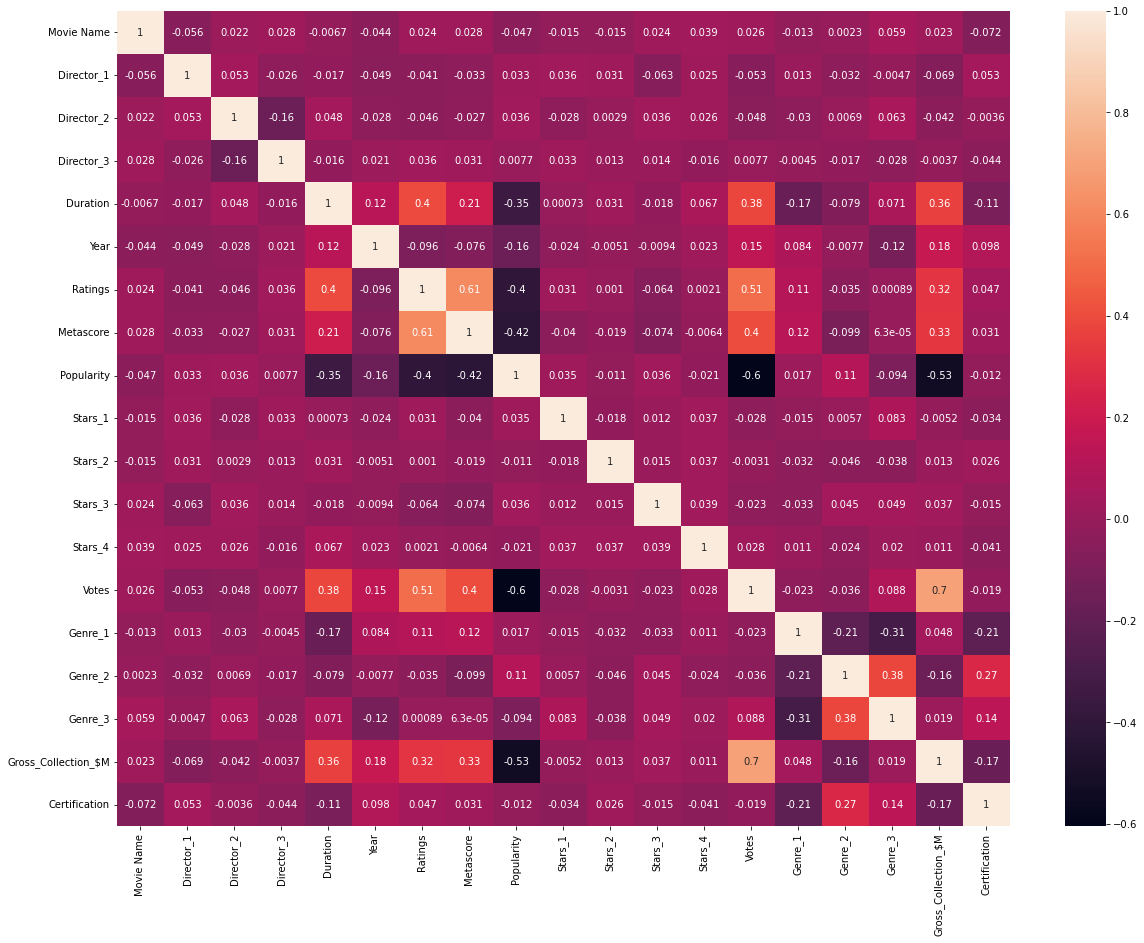

In [67]:
plt.figure(figsize=(20,15))
sns.heatmap(df_corr,annot=True)

- Duration and Gross Collection has possitive correlation with an amount of 0.36 similarlly with Votes with amount of 0.38. It means that Duration plays possitive correlation with Votes and Gross Collection  
- Ratings and Metascore also makes a possive impact on Gross_collections and Votes 
- Popularity makes an huge negative impact on Gross_collections and Votes. So popularity should be minimum to acheive good Gross_collection snf Votes 
- Votes has maximum positive correlation with Gross_collections with the amount of 0.7
- Genre-2 are creating positive correlation with both Gross_collection as well as Votes while Genre-1 and Genre-3 creates nagative correlation with output variables 
- Certificates doesn't plays a vital role in predicting outputs 
- All stars does not make considearable contribution to the outputs 
- Years has a possitive correlation with Votes and Gross_collections 

In [68]:
df_corr['Votes'].sort_values(ascending= False)

Votes                  1.000000
Gross_Collection_$M    0.698887
Ratings                0.507962
Metascore              0.399654
Duration               0.384336
Year                   0.152948
Genre_3                0.088212
Stars_4                0.027835
Movie Name             0.026291
Director_3             0.007684
Stars_2               -0.003101
Certification         -0.019020
Stars_3               -0.022633
Genre_1               -0.022983
Stars_1               -0.028029
Genre_2               -0.035931
Director_2            -0.047680
Director_1            -0.052988
Popularity            -0.604513
Name: Votes, dtype: float64

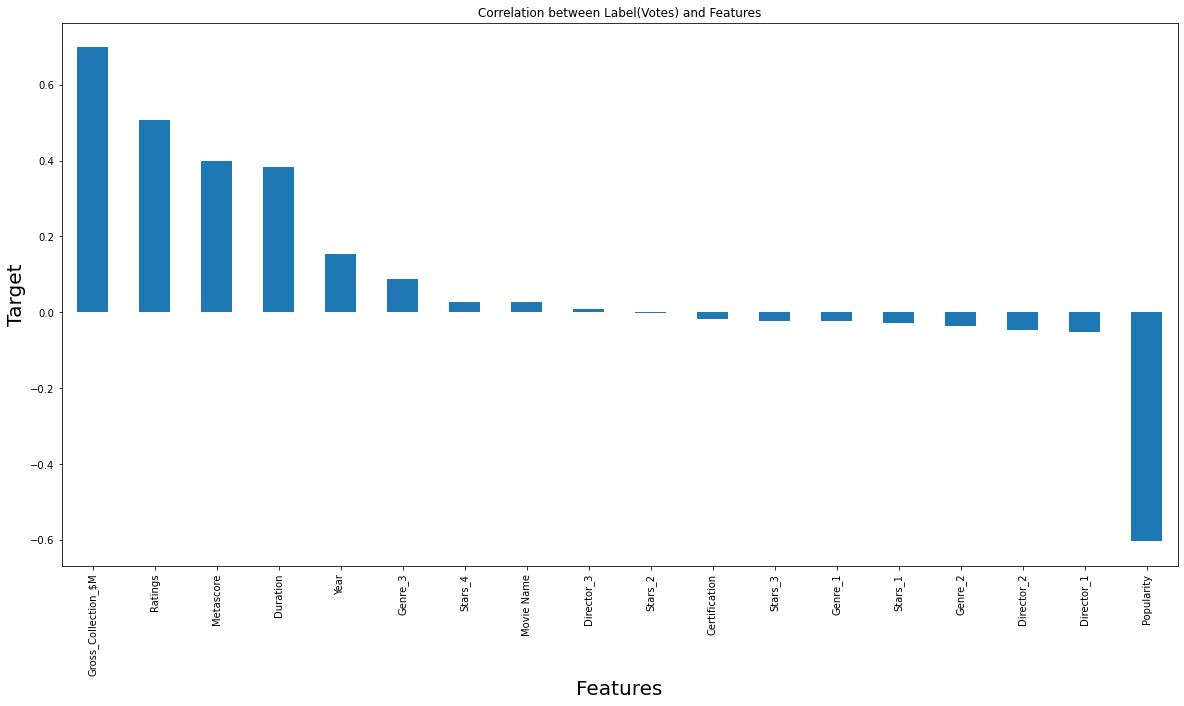

In [97]:
plt.figure(figsize=(20,10))
df.corr()['Votes'].sort_values(ascending=False).drop(['Votes']).plot(kind='bar')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between Label(Votes) and Features')
plt.show()

- The main factors affecting on the Votes are Gross_collections, Rating, Metascore,Duration in positive way while Popularity plays nagative impact on Votes 
- 

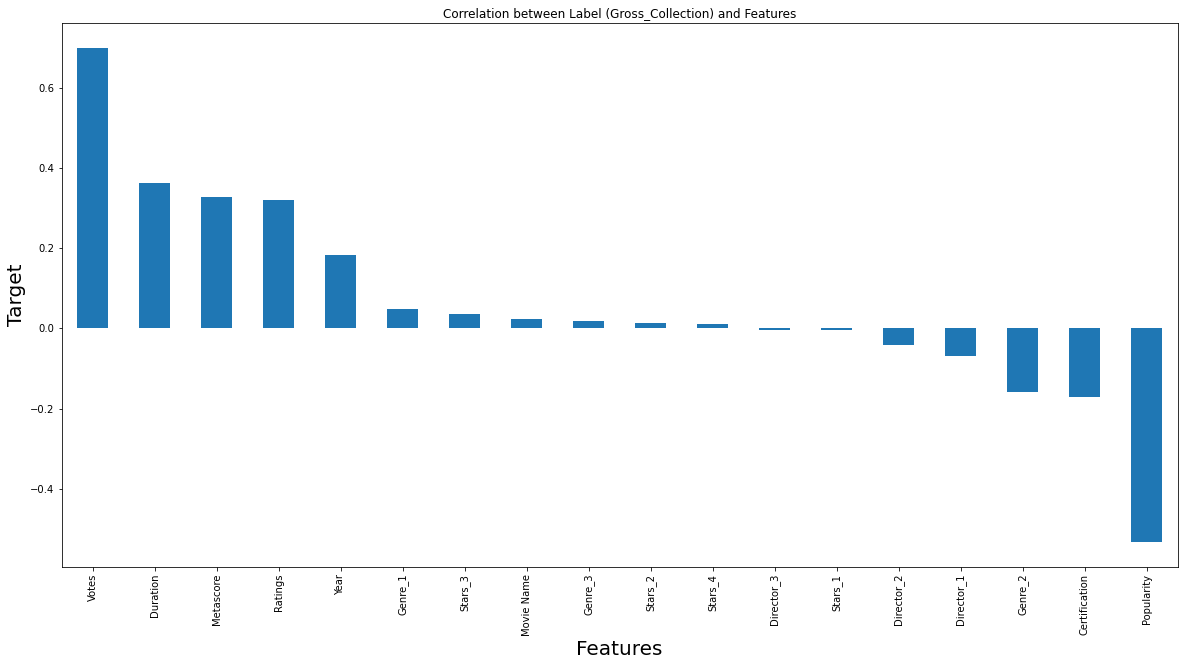

In [96]:
plt.figure(figsize=(20,10))
df.corr()['Gross_Collection_$M'].sort_values(ascending=False).drop(['Gross_Collection_$M']).plot(kind='bar')
plt.xlabel('Features',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation between Label (Gross_Collection) and Features')
plt.show()

- The coorelation of features with target is required to analyze the target to understand the impact of features on target.
- The meajor possitive correlation and contribution for predicting Gross_collection are Votes, Duration, Metascore, Rating Year, Genre_1 and Stars_3 while Popularity, Certification, Genre_2 and Genre_1 and Director_2 has negative impact on target.
- Rest of all ( Movie_names, Genre_3, Stars_2, Stars_4, Direction_3, Stars_1) has niglisible effect on prediction of Targets 

In [100]:
from statsmodels .stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]
vif['Features']= df1.columns
vif

,VIF Values,Features
0,1.023038,Movie Name
1,1.022181,Director_1
2,1.017112,Director_2
3,329732.036939,Director_3
4,1.403843,Duration
5,1.182667,Year
6,2.170726,Ratings
7,1.682416,Metascore
8,2.025281,Popularity
9,1.036571,Stars_1


- As veriance Inflection Factor is very high or greater than 10 for Director_3 we are dropping that column from data set

In [108]:
df1=df1.drop('Director_3', axis=1)
df1

,Movie Name,Director_1,Director_2,Duration,Year,Ratings,Metascore,Popularity,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Gross_Collection_$M,Certification
15,44.0,196.0,33.0,5.155137,12.569743,8.4,84.0,154,441.0,558.0,124.0,759.0,732615,0.0,1.0,13.0,85.16,7.0
18,396.0,365.0,33.0,5.539658,12.588702,8.3,76.0,18,6.0,675.0,915.0,476.0,676362,0.0,4.0,4.0,67.44,7.0
23,222.0,399.0,33.0,5.440122,12.632719,8.3,0.0,1045,0.0,706.0,294.0,877.0,197349,0.0,2.0,4.0,12.39,3.0
24,486.0,445.0,33.0,5.517848,12.645239,8.3,0.0,1427,503.0,714.0,747.0,912.0,139647,0.0,4.0,4.0,6.60,3.0
30,7.0,507.0,33.0,4.918685,12.638982,8.2,78.0,131,115.0,265.0,194.0,173.0,621179,0.0,5.0,16.0,159.23,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,435.0,590.0,33.0,5.026526,12.613892,3.8,15.0,1295,214.0,688.0,748.0,572.0,50115,0.0,1.0,6.0,4.54,5.0
1460,914.0,494.0,33.0,4.562903,12.603409,3.8,12.0,1611,134.0,345.0,745.0,847.0,26458,0.0,3.0,13.0,4.42,5.0
1461,100.0,230.0,33.0,5.000000,12.592908,3.7,28.0,321,31.0,263.0,148.0,985.0,259632,0.0,12.0,11.0,107.33,5.0
1462,916.0,480.0,33.0,4.530655,12.609701,3.7,38.0,757,67.0,264.0,530.0,214.0,39948,0.0,1.0,2.0,39.18,4.0


# First Case: Votes

In [109]:
x

,Movie Name,Director_1,Director_2,Duration,Year,Ratings,Metascore,Popularity,Stars_1,Stars_2,Stars_3,Stars_4,Genre_1,Genre_2,Genre_3,Gross_Collection_$M,Certification
15,44.0,196.0,33.0,5.155137,12.569743,8.4,84.0,154,441.0,558.0,124.0,759.0,0.0,1.0,13.0,85.16,7.0
18,396.0,365.0,33.0,5.539658,12.588702,8.3,76.0,18,6.0,675.0,915.0,476.0,0.0,4.0,4.0,67.44,7.0
23,222.0,399.0,33.0,5.440122,12.632719,8.3,0.0,1045,0.0,706.0,294.0,877.0,0.0,2.0,4.0,12.39,3.0
24,486.0,445.0,33.0,5.517848,12.645239,8.3,0.0,1427,503.0,714.0,747.0,912.0,0.0,4.0,4.0,6.60,3.0
30,7.0,507.0,33.0,4.918685,12.638982,8.2,78.0,131,115.0,265.0,194.0,173.0,0.0,5.0,16.0,159.23,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,435.0,590.0,33.0,5.026526,12.613892,3.8,15.0,1295,214.0,688.0,748.0,572.0,0.0,1.0,6.0,4.54,5.0
1460,914.0,494.0,33.0,4.562903,12.603409,3.8,12.0,1611,134.0,345.0,745.0,847.0,0.0,3.0,13.0,4.42,5.0
1461,100.0,230.0,33.0,5.000000,12.592908,3.7,28.0,321,31.0,263.0,148.0,985.0,0.0,12.0,11.0,107.33,5.0
1462,916.0,480.0,33.0,4.530655,12.609701,3.7,38.0,757,67.0,264.0,530.0,214.0,0.0,1.0,2.0,39.18,4.0


In [110]:
x= df1.drop('Votes', axis=1)

In [111]:
y=df1['Votes']
y

15      732615
18      676362
23      197349
24      139647
30      621179
         ...  
1458     50115
1460     26458
1461    259632
1462     39948
1463     50631
Name: Votes, Length: 1087, dtype: int64

In [112]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score,r2_score
from sklearn.linear_model import LinearRegression 

In [113]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=1)

In [114]:
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((760, 17), (327, 17), (760,), (327,))

In [115]:
lr= LinearRegression()

In [116]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
#y_pred

In [117]:
print(mean_absolute_error(y_pred,y_test))

63530.172693559085


In [118]:
print(mean_squared_error(y_test,y_pred))

8510737549.221619


## Prediction of random State

In [119]:
lr = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr.fit(x_train,y_train)
    lr_predict_train=lr.predict(x_train)
    lr_predict_test=lr.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,lr_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,lr_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.7413123874244404
At random state 0, The test accuracy is :-0.6467799537777277


At random state 1, The training accuracy is :-0.7093422828488087
At random state 1, The test accuracy is :-0.7333600353869928


At random state 2, The training accuracy is :-0.6961679510630946
At random state 2, The test accuracy is :-0.74475740008462


At random state 3, The training accuracy is :-0.7122541669269993
At random state 3, The test accuracy is :-0.7292755789090951


At random state 4, The training accuracy is :-0.7396695610618012
At random state 4, The test accuracy is :-0.658244674708633


At random state 5, The training accuracy is :-0.7421817255934187
At random state 5, The test accuracy is :-0.637034339486904


At random state 6, The training accuracy is :-0.7466531104937006
At random state 6, The test accuracy is :-0.6624064770374198


At random state 7, The training accuracy is :-0.7124764979821403
At random state 7, The test accuracy is :-0

In [120]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.33,random_state=27)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(728, 17) (728,)
(359, 17) (359,)


In [121]:
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [122]:
lr=LinearRegression()
lasso=linear_model.Lasso()
svr=SVR()
dtr=DecisionTreeRegressor()
knn=KNeighborsRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

Scores for LinearRegression() are
Mean Absolute Error: 64403.5302969258
Mean Squared Error: 7607868611.94794
Root Mean Squared Error: 87223.09678031353
R squared score:  0.712608815181107
Cross Validation Score is : [0.75964423 0.63732403 0.75326253 0.65875505 0.71033383]
Mean Score : 0.7038639366359243
Difference : -0.008744878545182688


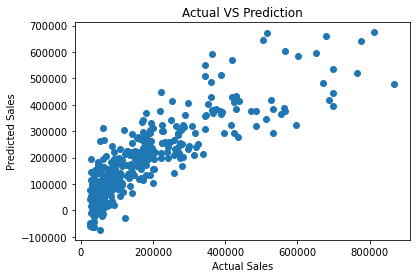

Scores for Lasso() are
Mean Absolute Error: 64405.50556911153
Mean Squared Error: 7608293385.096
Root Mean Squared Error: 87225.53172721849
R squared score:  0.7125927691550087
Cross Validation Score is : [0.75969537 0.63730918 0.75328599 0.65870559 0.71035164]
Mean Score : 0.7038695541512571
Difference : -0.008723215003751617


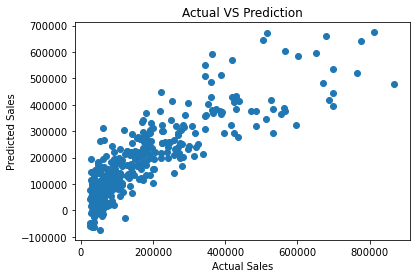

Scores for SVR() are
Mean Absolute Error: 112339.78361495958
Mean Squared Error: 29464143215.007465
Root Mean Squared Error: 171651.22549812298
R squared score:  -0.11302329997342575
Cross Validation Score is : [-0.13382893 -0.12640359 -0.11454687 -0.16773906 -0.17642251]
Mean Score : -0.14378819314927985
Difference : -0.030764893175854097


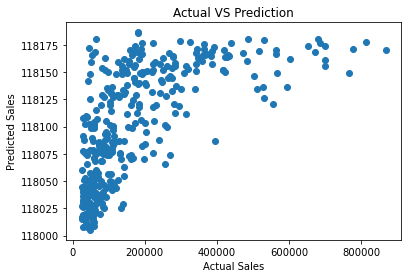

Scores for DecisionTreeRegressor() are
Mean Absolute Error: 73353.3983286908
Mean Squared Error: 13828006885.860723
Root Mean Squared Error: 117592.54604719095
R squared score:  0.477639864025754
Cross Validation Score is : [0.67465714 0.64060606 0.69277757 0.41908714 0.52716026]
Mean Score : 0.5908576344786921
Difference : 0.11321777045293813


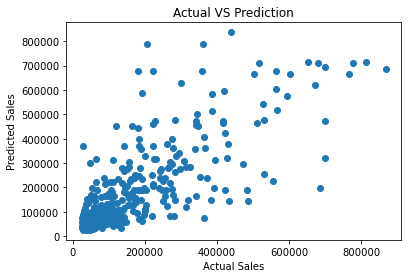

Scores for KNeighborsRegressor() are
Mean Absolute Error: 83732.47855153204
Mean Squared Error: 14846528527.531033
Root Mean Squared Error: 121846.33161294201
R squared score:  0.43916468046335455
Cross Validation Score is : [0.54691476 0.53025481 0.54888151 0.45671037 0.33483249]
Mean Score : 0.4835187885751863
Difference : 0.04435410811183177


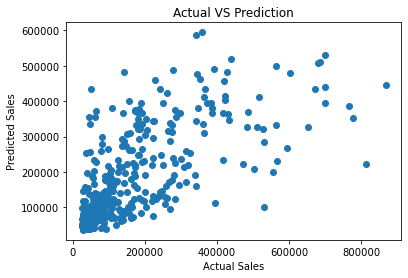

Scores for RandomForestRegressor() are
Mean Absolute Error: 54970.86116991643
Mean Squared Error: 6653723779.352128
Root Mean Squared Error: 81570.3609122341
R squared score:  0.7486521313732257
Cross Validation Score is : [0.84144755 0.77091462 0.86154883 0.75178593 0.72676464]
Mean Score : 0.7904923126506593
Difference : 0.04184018127743361


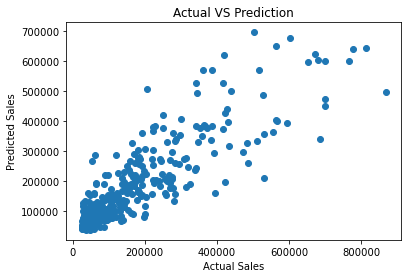

Scores for GradientBoostingRegressor() are
Mean Absolute Error: 49391.27763217252
Mean Squared Error: 5494019591.707913
Root Mean Squared Error: 74121.65400008229
R squared score:  0.7924605588746001
Cross Validation Score is : [0.89872408 0.80266668 0.87688061 0.74721913 0.79296275]
Mean Score : 0.8236906493013395
Difference : 0.03123009042673941


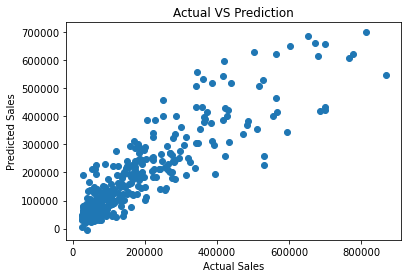

In [123]:
model=[lr,lasso,svr,dtr,knn,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:',mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("=====================================================")

# From above analysis it is clear that The differencescore and r2 score is minimum in Lasso algorith and which is around - 0.008723 whihc is considrably good.  So we are accepting Lasso regression for prediction perpose in case of Votes 

# Case 2: Gross Collection

In [124]:
xx=df1.drop('Gross_Collection_$M', axis=1)
yy=df1['Gross_Collection_$M']

In [125]:
xx

,Movie Name,Director_1,Director_2,Duration,Year,Ratings,Metascore,Popularity,Stars_1,Stars_2,Stars_3,Stars_4,Votes,Genre_1,Genre_2,Genre_3,Certification
15,44.0,196.0,33.0,5.155137,12.569743,8.4,84.0,154,441.0,558.0,124.0,759.0,732615,0.0,1.0,13.0,7.0
18,396.0,365.0,33.0,5.539658,12.588702,8.3,76.0,18,6.0,675.0,915.0,476.0,676362,0.0,4.0,4.0,7.0
23,222.0,399.0,33.0,5.440122,12.632719,8.3,0.0,1045,0.0,706.0,294.0,877.0,197349,0.0,2.0,4.0,3.0
24,486.0,445.0,33.0,5.517848,12.645239,8.3,0.0,1427,503.0,714.0,747.0,912.0,139647,0.0,4.0,4.0,3.0
30,7.0,507.0,33.0,4.918685,12.638982,8.2,78.0,131,115.0,265.0,194.0,173.0,621179,0.0,5.0,16.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,435.0,590.0,33.0,5.026526,12.613892,3.8,15.0,1295,214.0,688.0,748.0,572.0,50115,0.0,1.0,6.0,5.0
1460,914.0,494.0,33.0,4.562903,12.603409,3.8,12.0,1611,134.0,345.0,745.0,847.0,26458,0.0,3.0,13.0,5.0
1461,100.0,230.0,33.0,5.000000,12.592908,3.7,28.0,321,31.0,263.0,148.0,985.0,259632,0.0,12.0,11.0,5.0
1462,916.0,480.0,33.0,4.530655,12.609701,3.7,38.0,757,67.0,264.0,530.0,214.0,39948,0.0,1.0,2.0,4.0


In [126]:
yy

15       85.16
18       67.44
23       12.39
24        6.60
30      159.23
         ...  
1458      4.54
1460      4.42
1461    107.33
1462     39.18
1463     15.68
Name: Gross_Collection_$M, Length: 1087, dtype: float64

In [127]:
x_train,x_test,y_train,y_test= train_test_split(xx,yy,test_size=0.3, random_state=1)

In [128]:
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((760, 17), (327, 17), (760,), (327,))

## Prediction of random State

In [129]:
lr = LinearRegression()
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr.fit(x_train,y_train)
    lr_predict_train=lr.predict(x_train)
    lr_predict_test=lr.predict(x_test)
    print(f'At random state {i}, The training accuracy is :-{r2_score(y_train,lr_predict_train)}')
    print(f'At random state {i}, The test accuracy is :-{r2_score(y_test,lr_predict_test)}')
    print('\n')

At random state 0, The training accuracy is :-0.7413123874244404
At random state 0, The test accuracy is :-0.6467799537777277


At random state 1, The training accuracy is :-0.7093422828488087
At random state 1, The test accuracy is :-0.7333600353869928


At random state 2, The training accuracy is :-0.6961679510630946
At random state 2, The test accuracy is :-0.74475740008462


At random state 3, The training accuracy is :-0.7122541669269993
At random state 3, The test accuracy is :-0.7292755789090951


At random state 4, The training accuracy is :-0.7396695610618012
At random state 4, The test accuracy is :-0.658244674708633


At random state 5, The training accuracy is :-0.7421817255934187
At random state 5, The test accuracy is :-0.637034339486904


At random state 6, The training accuracy is :-0.7466531104937006
At random state 6, The test accuracy is :-0.6624064770374198


At random state 7, The training accuracy is :-0.7124764979821403
At random state 7, The test accuracy is :-0

In [130]:
train_x,test_x,train_y,test_y=train_test_split(xx,yy,test_size=0.33,random_state=10)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(728, 17) (728,)
(359, 17) (359,)


Scores for LinearRegression() are
Mean Absolute Error: 30.167270054070944
Mean Squared Error: 1790.9780625243159
Root Mean Squared Error: 42.31994875380068
R squared score:  0.6334991026020458
Cross Validation Score is : [0.61695973 0.69176088 0.48830086 0.49628077 0.53491665]
Mean Score : 0.5656437785127049
Difference : -0.06785532408934092


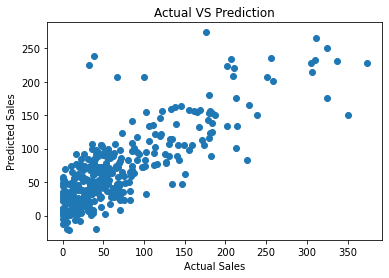

Scores for Lasso() are
Mean Absolute Error: 30.135757618995054
Mean Squared Error: 1782.3327382319887
Root Mean Squared Error: 42.21768276720063
R squared score:  0.635268258337526
Cross Validation Score is : [0.62120353 0.67516068 0.48400181 0.49182383 0.53196576]
Mean Score : 0.5608311203281253
Difference : -0.07443713800940066


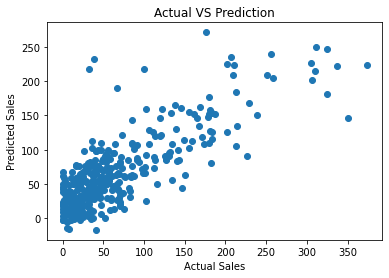

Scores for SVR() are
Mean Absolute Error: 34.598829917544535
Mean Squared Error: 2979.2466853430346
Root Mean Squared Error: 54.582475991320095
R squared score:  0.39033503168145134
Cross Validation Score is : [0.33265465 0.34619358 0.24847145 0.25286205 0.34358999]
Mean Score : 0.30475434533277884
Difference : -0.0855806863486725


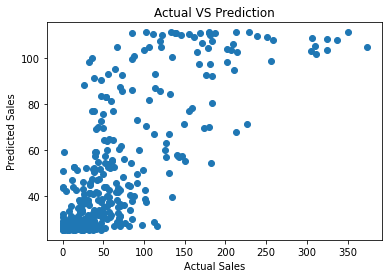

Scores for DecisionTreeRegressor() are
Mean Absolute Error: 38.570807799442896
Mean Squared Error: 3368.2370083565465
Root Mean Squared Error: 58.036514440105265
R squared score:  0.31073310609302085
Cross Validation Score is : [0.07597352 0.31288029 0.22319597 0.30570215 0.20556124]
Mean Score : 0.22466263280228754
Difference : -0.08607047329073331


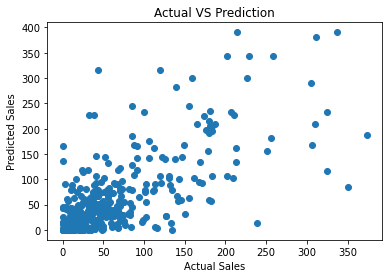

Scores for KNeighborsRegressor() are
Mean Absolute Error: 34.10641225626741
Mean Squared Error: 2546.5880869415046
Root Mean Squared Error: 50.463730410479016
R squared score:  0.47887311480995365
Cross Validation Score is : [0.46787808 0.52382692 0.25243927 0.31424987 0.3996902 ]
Mean Score : 0.39161686906585685
Difference : -0.0872562457440968


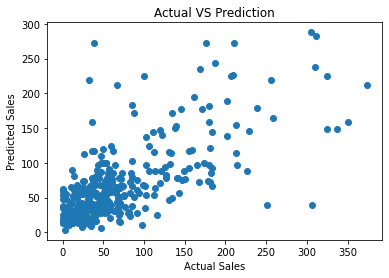

Scores for RandomForestRegressor() are
Mean Absolute Error: 27.258421448467967
Mean Squared Error: 1579.6522905913926
Root Mean Squared Error: 39.74483979828567
R squared score:  0.6767442359051123
Cross Validation Score is : [0.71118438 0.6906111  0.50738628 0.5357938  0.5655943 ]
Mean Score : 0.6021139697047729
Difference : -0.07463026620033941


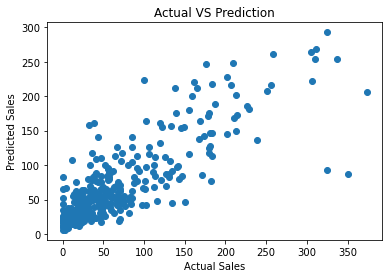

Scores for GradientBoostingRegressor() are
Mean Absolute Error: 25.59230169222558
Mean Squared Error: 1422.9806054062544
Root Mean Squared Error: 37.722415158712394
R squared score:  0.7088051050015607
Cross Validation Score is : [0.66945534 0.68885107 0.56449857 0.51784054 0.51608966]
Mean Score : 0.5913470371002567
Difference : -0.11745806790130398


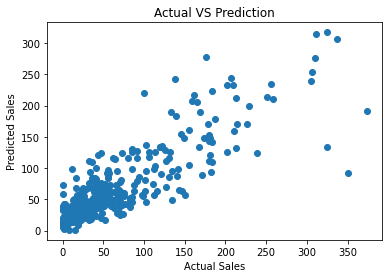

In [131]:
model=[lr,lasso,svr,dtr,knn,rfr,gbr]
for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print(f"Scores for {m} are")
    print('Mean Absolute Error:',mean_absolute_error(test_y, predm))  
    print('Mean Squared Error:', mean_squared_error(test_y, predm))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_y, predm)))
    print('R squared score: ', r2_score(test_y, predm))
    score=cross_val_score(m,train_x,train_y,cv=5)
    print("Cross Validation Score is :",score)
    print("Mean Score :",score.mean())
    print("Difference :",score.mean()-r2_score(test_y, predm))
    plt.scatter(test_y, predm)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title("Actual VS Prediction")
    plt.show()
    print("=====================================================")

# From above analysis it is clear that The difference score and r2 score is minimum in Linear Regression and which is around - 0.0678553 which is considrably good.  So we are accepting Linear Regression for prediction perpose in case of Gross_Collection